In [42]:
import random

import pandas as pd
import numpy as np
import orchest

import matplotlib.pyplot as plt

In [10]:
# Generate some dummy data

products = list(map(lambda x: "Product " + str(chr(65+x)), list(range(10))))

In [11]:
products

['Product A',
 'Product B',
 'Product C',
 'Product D',
 'Product E',
 'Product F',
 'Product G',
 'Product H',
 'Product I',
 'Product J']

In [15]:
# Product interactions
click_probability_distributions = np.array(list(map(lambda x: random.random(), range(len(products)))))
click_probability_distributions = click_probability_distributions / click_probability_distributions.sum()

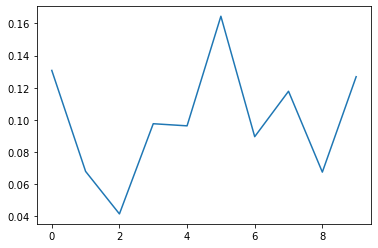

In [18]:
plt.plot(click_probability_distributions)

In [25]:
# Generate events
event_count = 2000

In [28]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [29]:
start = pd.to_datetime('2020-1-01')
end = pd.to_datetime('2022-01-01')

DatetimeIndex(['2020-04-11 13:14:04', '2020-02-08 15:32:23',
               '2021-11-16 16:48:23', '2021-08-14 10:26:38',
               '2021-09-27 21:08:45', '2021-03-12 07:33:13',
               '2020-08-06 01:36:00', '2021-05-28 09:44:14',
               '2020-05-04 18:49:02', '2020-08-20 04:34:26',
               ...
               '2021-09-13 21:49:36', '2020-10-20 10:47:51',
               '2020-03-17 14:10:30', '2020-11-03 04:58:16',
               '2020-04-22 14:59:46', '2021-04-01 21:41:23',
               '2021-03-16 13:46:29', '2021-09-22 05:17:41',
               '2020-02-07 07:37:41', '2020-02-14 14:31:24'],
              dtype='datetime64[ns]', length=2000, freq=None)

In [38]:
product_choices = np.random.choice(products, event_count, p=click_probability_distributions)
dates = random_dates(start, end, event_count)
actions = ["buy"] * event_count

In [39]:
df = pd.DataFrame(zip(product_choices, dates, actions), columns=['product', 'date', 'action'])

In [40]:
df

,product,date,action
0,Product J,2020-08-19 21:40:53,buy
1,Product A,2020-07-27 02:44:48,buy
2,Product J,2021-04-30 21:27:16,buy
3,Product E,2020-10-10 05:49:50,buy
4,Product J,2020-06-21 23:15:34,buy
...,...,...,...
1995,Product E,2020-11-02 03:45:50,buy
1996,Product B,2020-02-24 18:06:56,buy
1997,Product F,2021-04-15 14:57:58,buy
1998,Product C,2020-08-11 11:08:22,buy


In [43]:
orchest.output({"events": df, "products": products}, name="product_data")